<a href="https://colab.research.google.com/github/Shubhangi2612/insurance_claim-project/blob/master/Project_V_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Load the Drive helper and mount

---





In [ ]:
# Load the Drive helper and mount.
from google.colab import drive

# Loading libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.preprocessing import StandardScaler # used for feature scaling
from sklearn.compose import ColumnTransformer
%matplotlib inline
from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report 

import pandas as pd # used for handling dataset
import numpy as np # used for handling numbers
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
print("done importing")


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


done importing


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:

# This will prompt for authorization.
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#loading the dataset
!ls "/content/drive/MyDrive/Colab Notebooks/P42- Health Insurance/dataset/"

rawdata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/P42- Health Insurance/dataset/Insurance Dataset.csv")


'Insurance Dataset.csv'  'Insurance Dataset.csv.hdf5'


In [ ]:
#setting the output screen to display all columns and viewing the records
pd.set_option('display.max_columns', None) 

In [ ]:
rawdata.head()

In [ ]:
rawdata.tail()

In [ ]:
# Display the data types of columns
rawdata.info()

In [ ]:
# Display basic statistics 
rawdata.describe()


In [ ]:
rawdata.describe(include=np.object)

In [ ]:
#checking the count value for each column
for column in rawdata.columns:
     print("\n" + column)
     print(rawdata[column].value_counts())


In [ ]:
#rename the column name
insurance_data = rawdata
insurance_data =  insurance_data.rename(columns = {'Emergency dept_yes/No': 'Emergency_dept','Home or self care,':'Home_or_self_care',
                                               'Mortality risk':'Mortality_risk','Hospital County':'Hospital_County','Hospital Id':'Hospital_Id'})


In [ ]:
# View shape of data
insurance_data.shape

(1048575, 24)

In [ ]:
# cross table for checking the impact on output variable

pd.crosstab(insurance_data.Emergency_dept,insurance_data.Result)
pd.crosstab(insurance_data.Age,insurance_data.Result)
pd.crosstab(insurance_data.Area_Service,insurance_data.Result)
pd.crosstab(insurance_data.Gender,insurance_data.Result)
pd.crosstab(insurance_data.Cultural_group,insurance_data.Result)
pd.crosstab(insurance_data.ethnicity,insurance_data.Result)
pd.crosstab(insurance_data.Admission_type,insurance_data.Result)
pd.crosstab(insurance_data.Home_or_self_care,insurance_data.Result)
pd.crosstab(insurance_data.ccs_diagnosis_code,insurance_data.Result)
pd.crosstab(insurance_data.ccs_procedure_code,insurance_data.Result)
pd.crosstab(insurance_data.apr_drg_description,insurance_data.Result)
pd.crosstab(insurance_data.Code_illness,insurance_data.Result)
pd.crosstab(insurance_data.Abortion,insurance_data.Result)
pd.crosstab(insurance_data.Mortality_risk,insurance_data.Result)
pd.crosstab(insurance_data.Surg_Description,insurance_data.Result)
pd.crosstab(insurance_data.Weight_baby,insurance_data.Result)
pd.crosstab(insurance_data.Payment_Typology,insurance_data.Result)


Result,0,1
Payment_Typology,,
1,86328,258115
2,107474,323217
3,67466,202405
4,879,2625
5,21,45


In [ ]:
#taking care of missing data
insurance_data.isnull().sum()

In [ ]:
#drop nan values in column
insurance_data = insurance_data.dropna(subset=['Hospital_Id','Mortality_risk','Area_Service','Hospital_County'],how = 'any')


In [ ]:
#View the variabes 
insurance_data.isnull().sum()

Area_Service                             0
Hospital_County                          0
Hospital_Id                              0
Age                                      0
Gender                                   0
Cultural_group                           0
ethnicity                                0
Days_spend_hsptl                         0
Admission_type                           0
Home_or_self_care                        0
ccs_diagnosis_code                       0
ccs_procedure_code                       0
apr_drg_description                      0
Code_illness                             0
Mortality_risk                           0
Surg_Description                         0
Weight_baby                              0
Abortion                                 0
Emergency_dept                           0
Tot_charg                                0
Tot_cost                                 0
ratio_of_total_costs_to_total_charges    0
Result                                   0
Payment_Typ

In [ ]:
#removes duplicates
insurance_data.drop_duplicates(keep='first',inplace=True)

In [ ]:
insurance_data.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1048570    False
1048571    False
1048572    False
1048573    False
1048574    False
Length: 1041265, dtype: bool

In [ ]:
# checking datatypes
insurance_data.dtypes

In [ ]:
 #Encoding the categorical variables using label encoder
 
def MultiLabelEncoder(columnlist,dataframe):
    for i in columnlist:

        labelencoder_X = LabelEncoder()
        dataframe[i] = labelencoder_X.fit_transform(dataframe[i])


columnlist = ['Area_Service','Hospital_County','Age','Gender','Days_spend_hsptl','Admission_type','Home_or_self_care','Surg_Description',
              'Emergency_dept','Cultural_group','ethnicity','apr_drg_description','Abortion']
MultiLabelEncoder(columnlist,insurance_data)

In [ ]:
# check first few records for labeled data
insurance_data.head()

,Area_Service,Hospital_County,Hospital_Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,Home_or_self_care,ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality_risk,Surg_Description,Weight_baby,Abortion,Emergency_dept,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,6,1,37.0,2,0,3,0,54,0,7,122,0,237,1,1.0,0,0,0,1,5511.95,5582.49,1.012798,1,1
1,6,1,37.0,4,0,3,0,54,5,17,197,0,38,3,2.0,0,0,0,1,4783.20,5162.82,1.079365,1,1
2,6,1,37.0,2,0,3,0,43,5,7,122,0,237,1,1.0,0,0,0,1,3829.15,4056.52,1.059379,1,1
3,6,1,37.0,0,0,3,0,0,5,7,122,0,237,1,1.0,0,0,0,1,1108.20,1644.75,1.484167,0,1
4,6,1,37.0,4,0,3,0,43,0,7,122,0,237,2,3.0,0,0,0,1,3418.18,3370.87,0.986161,1,1


In [ ]:
# View datatypes labeled data
insurance_data.dtypes

Area_Service                               int64
Hospital_County                            int64
Hospital_Id                              float64
Age                                        int64
Gender                                     int64
Cultural_group                             int64
ethnicity                                  int64
Days_spend_hsptl                           int64
Admission_type                             int64
Home_or_self_care                          int64
ccs_diagnosis_code                         int64
ccs_procedure_code                         int64
apr_drg_description                        int64
Code_illness                               int64
Mortality_risk                           float64
Surg_Description                           int64
Weight_baby                                int64
Abortion                                   int64
Emergency_dept                             int64
Tot_charg                                float64
Tot_cost            

In [ ]:
## "Feature Engineering"##
# splitting data for feature Engineering
X = insurance_data.loc[:, insurance_data.columns != 'Result']
Y = insurance_data.loc[: , 'Result'].values

In [ ]:
print(X)

In [ ]:
print(Y)

[1 1 1 ... 0 1 1]


In [ ]:
# Using extra tree classifier
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)


[0.01814463 0.02790761 0.04788191 0.03448476 0.0143944  0.01136035
 0.00636658 0.06961519 0.01075343 0.03819189 0.07673763 0.05228042
 0.06677969 0.0310636  0.01706664 0.00256667 0.01752041 0.
 0.00407825 0.14113652 0.14154989 0.13893725 0.03118229]


Feature: 0, Score: 0.01234
Feature: 1, Score: 0.01535
Feature: 2, Score: 0.03154
Feature: 3, Score: 0.03104
Feature: 4, Score: 0.01707
Feature: 5, Score: 0.01836
Feature: 6, Score: 0.01028
Feature: 7, Score: 0.04497
Feature: 8, Score: 0.01219
Feature: 9, Score: 0.03023
Feature: 10, Score: 0.06533
Feature: 11, Score: 0.04053
Feature: 12, Score: 0.05808
Feature: 13, Score: 0.02786
Feature: 14, Score: 0.02059
Feature: 15, Score: 0.00325
Feature: 16, Score: 0.01299
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00713
Feature: 19, Score: 0.16975
Feature: 20, Score: 0.17111
Feature: 21, Score: 0.18061
Feature: 22, Score: 0.01938


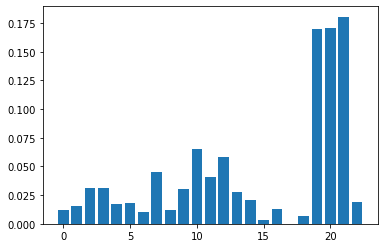

In [ ]:
# Decision Tree to find feature importance in bar graph

from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, Y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %1d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
# checking for features columns
X.columns

Index(['Area_Service', 'Hospital_County', 'Hospital_Id', 'Age', 'Gender',
       'Cultural_group', 'ethnicity', 'Days_spend_hsptl', 'Admission_type',
       'Home_or_self_care', 'ccs_diagnosis_code', 'ccs_procedure_code',
       'apr_drg_description', 'Code_illness', 'Mortality_risk',
       'Surg_Description', 'Weight_baby', 'Abortion', 'Emergency_dept',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Payment_Typology'],
      dtype='object')

In [ ]:
#drop insignificant fields
insurance_data = insurance_data.drop(columns=['Area_Service','Hospital_County','Gender','Cultural_group','ethnicity','Admission_type',
                                        'Surg_Description','Weight_baby','Abortion','Emergency_dept','Payment_Typology'])

In [ ]:
# View data after dropping features
insurance_data.head()

,Hospital_Id,Age,Days_spend_hsptl,Home_or_self_care,ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality_risk,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result
0,37.0,2,54,7,122,0,237,1,1.0,5511.95,5582.49,1.012798,1
1,37.0,4,54,17,197,0,38,3,2.0,4783.20,5162.82,1.079365,1
2,37.0,2,43,7,122,0,237,1,1.0,3829.15,4056.52,1.059379,1
3,37.0,0,0,7,122,0,237,1,1.0,1108.20,1644.75,1.484167,0
4,37.0,4,43,7,122,0,237,2,3.0,3418.18,3370.87,0.986161,1


In [ ]:
#Standardization
scaler = StandardScaler()

insurance_data.iloc[:,0:-1] = scaler.fit_transform(insurance_data.iloc[:,0:-1].to_numpy())


In [ ]:
# Checking data after standardization
print(insurance_data)

         Hospital_Id       Age  Days_spend_hsptl  Home_or_self_care  \
0          -0.917724 -0.340600          0.466709          -0.430925   
1          -0.917724  1.116857          0.466709           2.201506   
2          -0.917724 -0.340600          0.059286          -0.430925   
3          -0.917724 -1.798056         -1.533370          -0.430925   
4          -0.917724  1.116857          0.059286          -0.430925   
...              ...       ...               ...                ...   
1048570     0.768893  1.116857          1.281556           2.464749   
1048571     0.768893 -1.798056         -0.348138          -0.430925   
1048572     0.768893  0.388129         -0.607407           1.675019   
1048573     0.768893 -0.340600         -0.348138          -0.430925   
1048574     0.768893  0.388129         -0.348138          -0.430925   

         ccs_diagnosis_code  ccs_procedure_code  apr_drg_description  \
0                 -0.464319           -1.112820             0.820863   
1  

In [ ]:
# Data visualization
plt.rcParams['figure.figsize'] = (20,8)

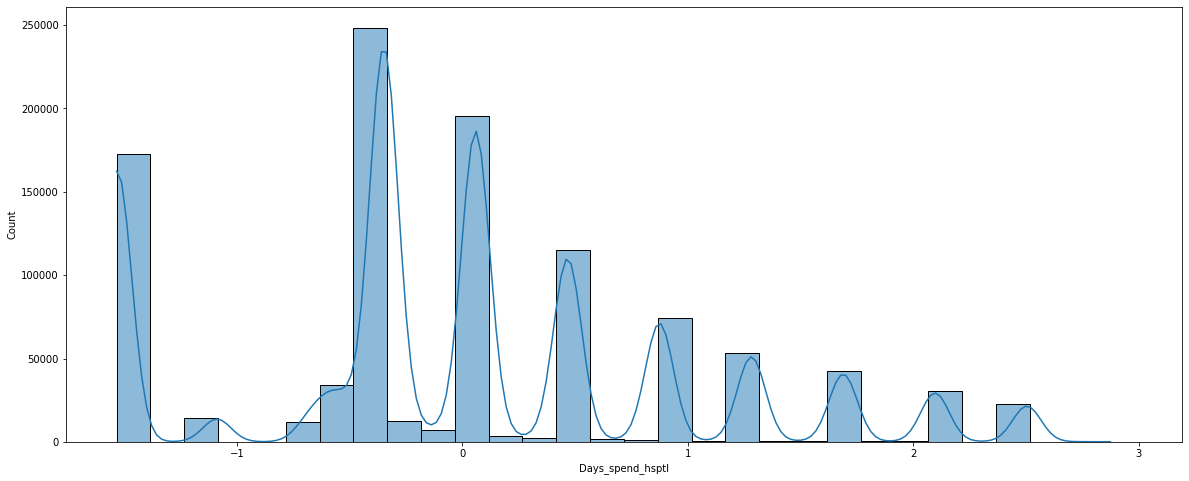

In [ ]:
sns.histplot(insurance_data["Days_spend_hsptl"],binwidth=0.15,kde = True)

plt.show()

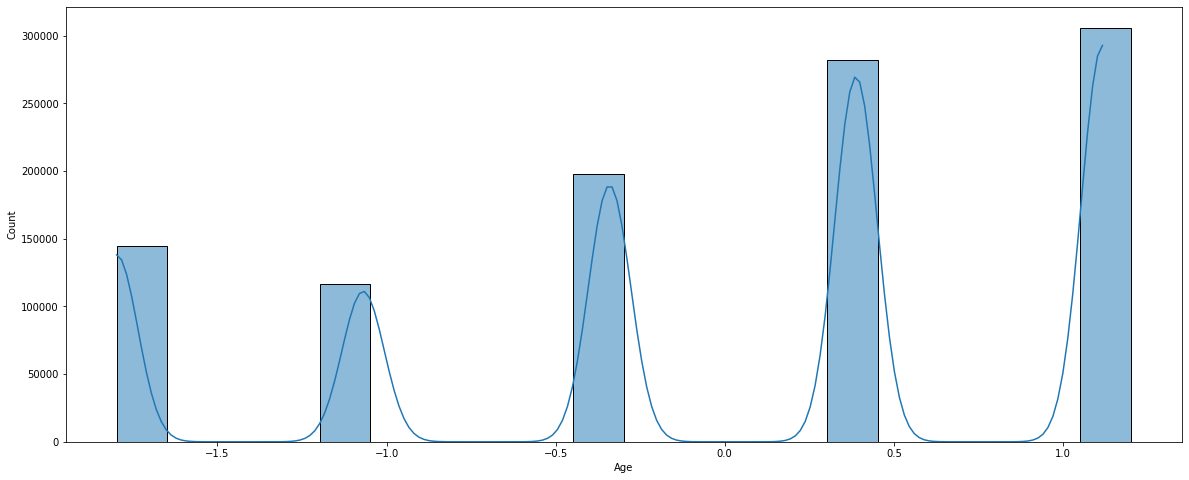

In [ ]:
sns.histplot(insurance_data["Age"],kde = True,binwidth=0.15)
plt.show()

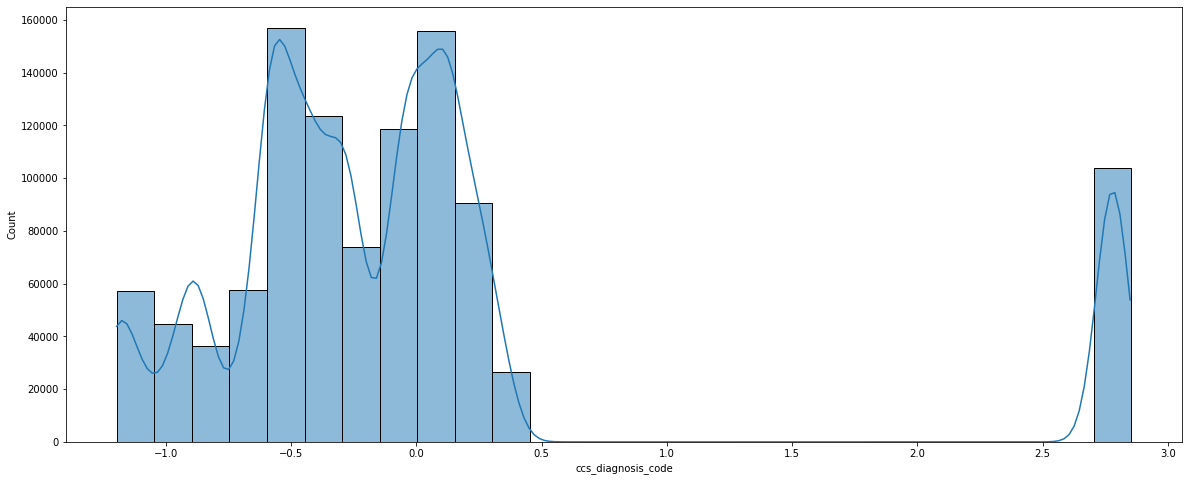

In [ ]:
sns.histplot(insurance_data["ccs_diagnosis_code"],kde = True,binwidth=0.15)
plt.show()

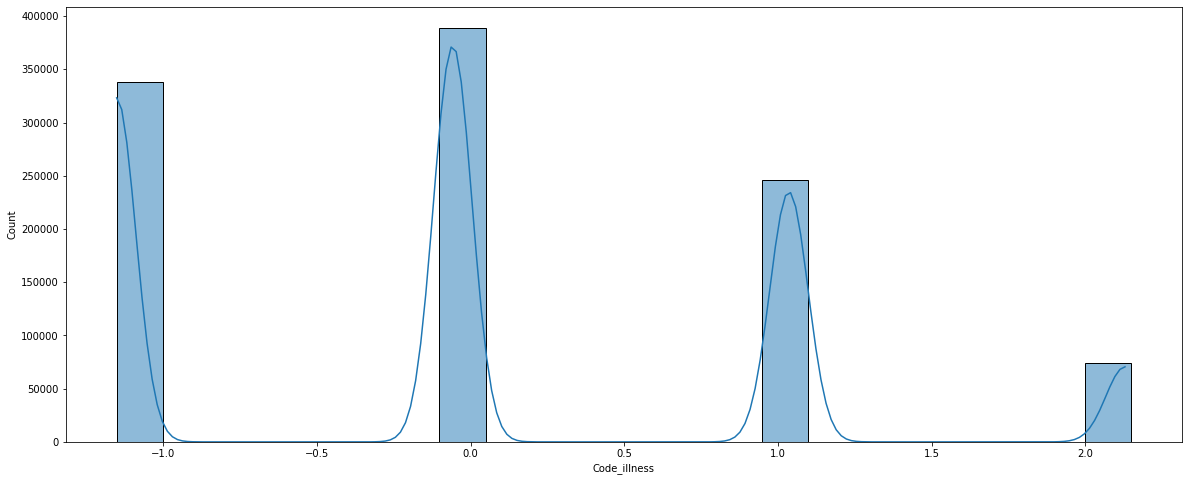

In [ ]:
sns.histplot(insurance_data["Code_illness"],kde = True,binwidth=0.15)
plt.show()

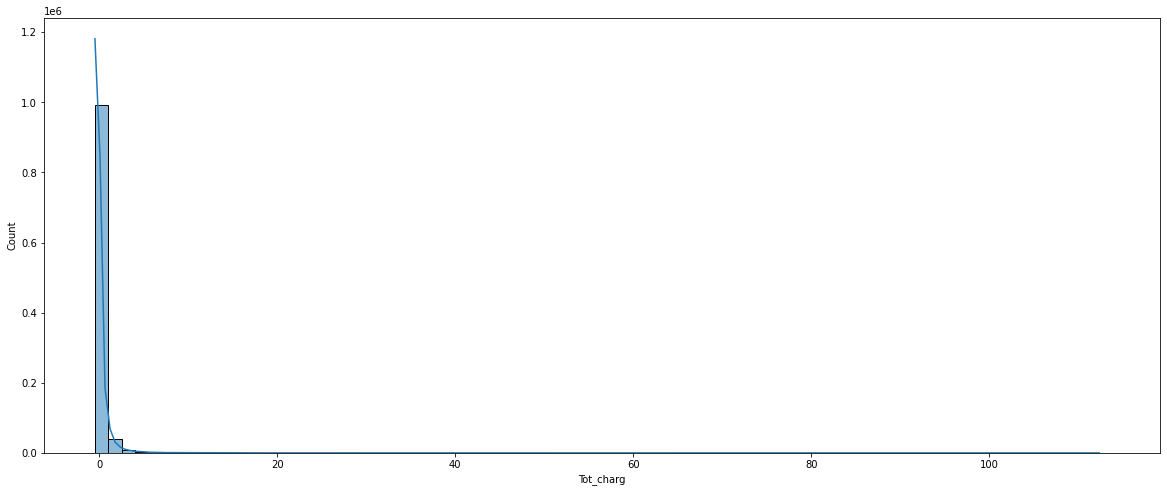

In [ ]:
sns.histplot(insurance_data["Tot_charg"],kde = True,binwidth=1.5)
plt.show()

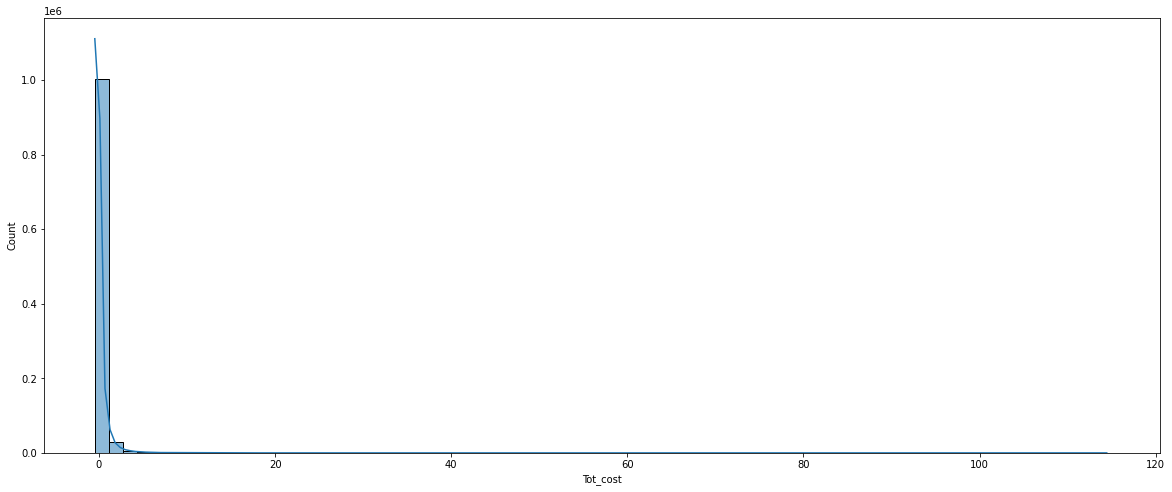

In [ ]:
sns.histplot(insurance_data["Tot_cost"],kde = True,binwidth=1.6)
plt.show()

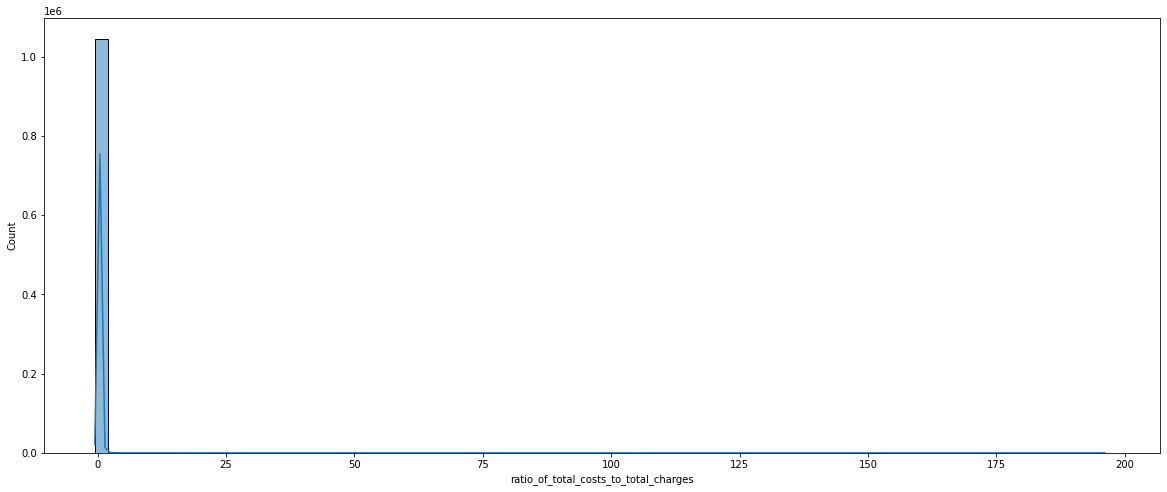

In [ ]:
sns.histplot(insurance_data["ratio_of_total_costs_to_total_charges"],kde = True,binwidth=2.5)
plt.show()

In [ ]:
#Calculate correlation among all variables
corr = insurance_data.corr()
pd.set_option('display.max_columns', None) 
print(corr)

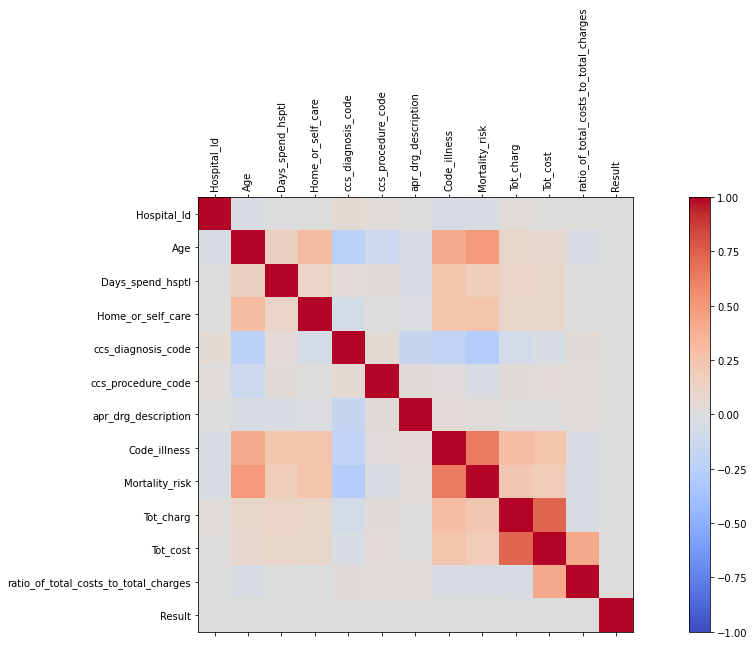

In [ ]:
#Correlation visualization among all variables
corr = insurance_data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(insurance_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation = 90)
ax.set_yticks(ticks)
ax.set_xticklabels(insurance_data.columns)
ax.set_yticklabels(insurance_data.columns)
plt.show()

(13.5, -0.5)

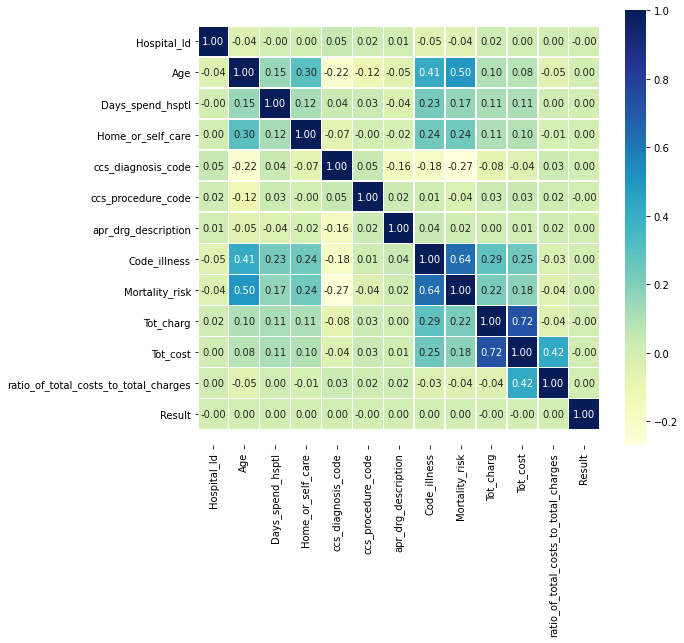

In [ ]:
#correlation matrix visualization
corrmat = insurance_data.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 

ax = sns.heatmap(corrmat,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
#covariance calculation among the all features
covMatrix = pd.DataFrame.cov(insurance_data)
pd.set_option('display.max_columns', None) 
print(covMatrix)

In [ ]:
#chekcing for multicollinearity using variable inflation factor VIF


def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [ ]:
X = insurance_data.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Hospital_Id,1.007365
1,Age,1.479463
2,Days_spend_hsptl,1.077660
3,Home_or_self_care,1.130509
4,ccs_diagnosis_code,1.137078
5,ccs_procedure_code,1.024024
6,apr_drg_description,1.039558
7,Code_illness,1.849593
8,Mortality_risk,1.949651
9,Tot_charg,3.082065


In [ ]:
#VIF starts at 1 and has no upper limit
#VIF = 1, no correlation between the independent variable and the other variables
#VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

# so as per the observation for multicolliniarity We can see there is no multicollinearity

In [ ]:
# making copy of data for visualizaton purpose only
ins_data = insurance_data.copy()
ins_data = pd.DataFrame(data = np.random.random(size=(4,11)), columns = ['Hospital_Id','Age','Days_spend_hsptl','Home_or_self_care','ccs_diagnosis_code','ccs_procedure_code','Code_illness',
                                                                            'apr_drg_description','Tot_charg','Tot_cost','ratio_of_total_costs_to_total_charges'])


In [ ]:
#visualizing data using pairplot
sns.pairplot(ins_data)

In [ ]:
# visualizing data using boxplot
sns.boxplot(x="variable", y="value", data=pd.melt(ins_data))  #found some outliers in home_self_care,ccs_procedure_code and in code_illness

plt.show()

In [ ]:
#Taking care of outliers using Z score method

z = np.abs(stats.zscore(insurance_data))


In [ ]:
print(z)

[[0.91918965 0.34954194 0.46444957 ... 0.22049087 0.69359683 0.57821931]
 [0.91918965 1.11434624 0.46444957 ... 0.23927351 0.77653185 0.57821931]
 [0.91918965 0.34954194 0.05759833 ... 0.28878677 0.75163169 0.57821931]
 ...
 [0.77126069 0.38240215 0.60815824 ... 0.63721472 0.2735644  1.72944761]
 [0.77126069 0.34954194 0.34925291 ... 0.16752022 0.26194014 0.57821931]
 [0.77126069 0.38240215 0.34925291 ... 0.24769474 0.31864753 0.57821931]]


In [ ]:
# From above code it is difficult to say which data point is an outlier so we define a threshold to identify the outlier
threshold = 3
print(np.where(z > 3))

(array([    705,     780,    1568, ..., 1041234, 1041236, 1041259]), array([11, 11, 11, ...,  9,  9,  9]))


In [ ]:
print(z[705][11])     # here we just crosscheck that 705 is row and 11 is column no. so it gives 3.22 value which is greater than 3
                      #so 705th row has an outlier

3.2246815956904102


In [ ]:
#using z score method we are removing outliers here
insurance_data = insurance_data[(z < 3).all(axis=1)]

In [ ]:
insurance_data.shape                     #previously in data there are 1048575 rows and now 1005575 remain after removing outliers

(1005575, 13)

In [ ]:
#check for imbalance data
insurance_data['Result'].value_counts()

1    753667
0    251908
Name: Result, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


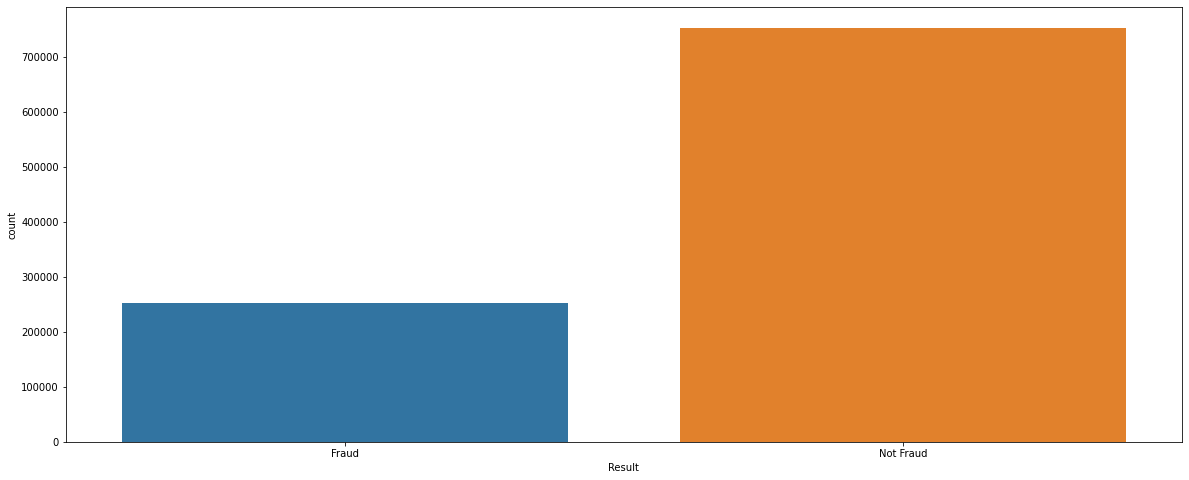

In [ ]:
#0 -> fruad
# 1 -> not fraud
# visualize the target variable
g = sns.countplot(insurance_data['Result'])
g.set_xticklabels(['Fraud','Not Fraud'])
plt.show()

In [ ]:
#we separate data using train and test set
#first we define input and output variables
y = insurance_data.Result
x = insurance_data.drop('Result',axis=1)

In [ ]:
x.head()

,Hospital_Id,Age,Days_spend_hsptl,Home_or_self_care,ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality_risk,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges
0,-0.91919,-0.349542,0.464450,-0.431916,-0.462745,-1.112121,0.819899,-1.156401,-0.762526,-0.394525,-0.220491,0.693597
1,-0.91919,1.114346,0.464450,2.196383,-0.009803,-1.112121,-1.217131,1.031419,0.250080,-0.407770,-0.239274,0.776532
2,-0.91919,-0.349542,0.057598,-0.431916,-0.462745,-1.112121,0.819899,-1.156401,-0.762526,-0.425109,-0.288787,0.751632
3,-0.91919,-1.813430,-1.532820,-0.431916,-0.462745,-1.112121,0.819899,-1.156401,-0.762526,-0.474563,-0.396727,1.280871
4,-0.91919,1.114346,0.057598,-0.431916,-0.462745,-1.112121,0.819899,-0.062491,1.262686,-0.432579,-0.319474,0.660410


In [ ]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: Result, dtype: int64

In [ ]:
#Splitting data into train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
#checking the shape of train and test data
print("shape of original dataset :", insurance_data.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)


shape of original dataset : (1005575, 13)
shape of input - training set (804460, 12)
shape of output - training set (804460,)
shape of input - testing set (201115, 12)
shape of output - testing set (201115,)


In [ ]:
##Stage 1: Building the models with imbalanced dataset

#check model using xgboost classifier
# import library
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb_model = XGBClassifier().fit(x_train, y_train)
# predict
xgb_y_predict = xgb_model.predict(x_test)
# accuracy score
xgb_score = accuracy_score(xgb_y_predict, y_test)
print('Accuracy score is:', xgb_score)

here used XGBclassifier with imbalance data. we are getting 75% accuracy becuase predicting mostly majority class

In [ ]:
##Model using random forest ensemble classifer 
# load library

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report

rfc = RandomForestClassifier()
#fit the predictor and target
rfc.fit(x_train, y_train)
# predict

rfc_predict = rfc.predict(x_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))
# print classification report 
predictions = rfc.predict(x_test)
print(classification_report(y_test, predictions)) 

using random forest ensemble method recall n f1 score is improved at majority class only ,along with that model accuracy is 73%

In [ ]:
# logistic regression model
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(x_train, y_train.ravel()) 
  
predictions = lr.predict(x_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     50371
           1       0.75      1.00      0.86    150744

    accuracy                           0.75    201115
   macro avg       0.37      0.50      0.43    201115
weighted avg       0.56      0.75      0.64    201115



we can see here f1 score for minority class is 0 and for majority class is 0.86 which is very huge difference between both classes and model accuracy is very less 75%

In [ ]:
##Stage 2: Model building with Balanced data
# Data balancing using SMOTE oversampling technique
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 

sm = SMOTE(random_state = 2) 
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_x: {}'.format(x_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 603012
Before OverSampling, counts of label '0': 201448 



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_x: (1206024, 12)
After OverSampling, the shape of train_y: (1206024,) 

After OverSampling, counts of label '1': 603012
After OverSampling, counts of label '0': 603012


In [ ]:
#model test after data balancing using logistic regression
#prediction and recall
lr1 = LogisticRegression() 
lr1.fit(x_train_res, y_train_res.ravel()) 
predictions = lr1.predict(x_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.25      0.57      0.35     50460
           1       0.75      0.43      0.55    150655

    accuracy                           0.47    201115
   macro avg       0.50      0.50      0.45    201115
weighted avg       0.62      0.47      0.50    201115



using SMOTE algorithm checked accuracy again but recall is bit adjust but still not good output using oversampling. accuracy is very low 47%


In [ ]:
##Stage 3: data split using Startified fold for data balancing  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

print('No Frauds', round(insurance_data['Result'].value_counts()[1]/len(insurance_data) * 100,2), '% of the dataset')
print('Frauds', round(insurance_data['Result'].value_counts()[0]/len(insurance_data) * 100,2), '% of the dataset')

X = insurance_data.drop('Result', axis=1)
y = insurance_data['Result']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))


No Frauds 74.95 % of the dataset
Frauds 25.05 % of the dataset
Train: [ 200429  200436  200439 ... 1005572 1005573 1005574] Test: [     0      1      2 ... 201338 201339 201340]
Train: [      0       1       2 ... 1005572 1005573 1005574] Test: [200429 200436 200439 ... 403174 403178 403187]
Train: [      0       1       2 ... 1005572 1005573 1005574] Test: [401905 401906 401907 ... 603349 603350 603351]
Train: [      0       1       2 ... 1005572 1005573 1005574] Test: [603309 603313 603316 ... 804721 804733 804745]
Train: [     0      1      2 ... 804721 804733 804745] Test: [ 804378  804379  804380 ... 1005572 1005573 1005574]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.2505109 0.7494891]
[0.25051339 0.74948661]


In [ ]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.
# shuffle the data before creating the subsamples
#Using Random Undersampling
insurance_data = insurance_data.sample(frac=1)

# amount of fraud classes 251896 rows.
fraud_data = insurance_data.loc[insurance_data['Result'] == 0]
non_fraud_data = insurance_data.loc[insurance_data['Result'] == 1][:251896]

normal_dist_data = pd.concat([fraud_data, non_fraud_data])

# Shuffle dataframe rows
new_insurance = normal_dist_data.sample(frac=1, random_state=42)

new_insurance.head()


,Hospital_Id,Age,Days_spend_hsptl,Home_or_self_care,ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality_risk,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result
1024949,0.771261,0.382402,0.871301,2.459213,-0.529177,1.327750,0.615172,1.031419,1.262686,0.294287,-0.076219,-0.315504,0
631956,-0.251671,0.382402,-0.349253,-0.431916,-0.897571,-1.112121,-0.991932,-1.156401,-0.762526,-0.361030,-0.354672,-0.130444,1
335288,0.560701,-1.081486,-1.532820,-0.431916,-0.106430,0.491550,1.515969,-1.156401,-0.762526,-0.393217,-0.372625,-0.081096,0
979447,0.765287,-1.813430,0.057598,-0.431916,0.117021,1.499572,0.164773,-1.156401,-0.762526,-0.447778,-0.374661,0.463339,1
266427,-0.357697,-1.813430,-0.349253,-0.431916,0.117021,-1.112121,0.164773,-1.156401,-0.762526,-0.454192,-0.415271,0.119496,0


Distribution of the Classes in the subsample dataset
0    0.500012
1    0.499988
Name: Result, dtype: float64


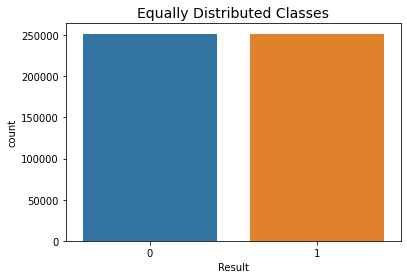

In [ ]:
# Data balancing visualization using countplot
import itertools 
print('Distribution of the Classes in the subsample dataset')
print(new_insurance['Result'].value_counts()/len(new_insurance))

sns.color_palette("pastel")
sns.countplot('Result', data=new_insurance)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [ ]:
# Undersampling before cross validating (prone to overfit)
X = new_insurance.drop('Result', axis=1)
y = new_insurance['Result']

In [ ]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
# implement simple classifiers
from sklearn.tree import DecisionTreeClassifier
classifiers = {
    "LogisiticRegression": LogisticRegression(),
     "Random Forest": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [ ]:
#Evaluating models using cross validation
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 50.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 50.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 50.0 % accuracy score


so by doing downsampling here we got very low accuracy for all three classifier

In [ ]:
###Stage 4: To improve the accuracy of model Upsampling is used

In [ ]:
#Upsampling: Random forest classifier
#Divinding data into majority n minority class
data_minority = insurance_data.loc[insurance_data['Result']==0]
data_majority = insurance_data.loc[insurance_data['Result']==1]

In [ ]:
#Resampling 
from sklearn.utils import resample
data_minority_upsampled = resample(data_minority, replace=True, n_samples=753678, random_state=42)

In [ ]:
data_upsampled = pd.concat([data_majority, data_minority_upsampled ], ignore_index=True)

In [ ]:
X = data_upsampled.drop(['Result'],axis=1).values
Y = data_upsampled.Result.values

In [ ]:
#Splitting data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=42)

In [ ]:
#Buiding Random Forest model using upsampling
from sklearn.ensemble import RandomForestClassifier
model_RF_upsampled = RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
model_RF_upsampled.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
#Classification report for train data
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model_RF_upsampled.predict(X_train)

print(classification_report(Y_train, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    527574
           1       0.99      0.99      0.99    527567

    accuracy                           0.99   1055141
   macro avg       0.99      0.99      0.99   1055141
weighted avg       0.99      0.99      0.99   1055141



In [ ]:
#classification report for test data
Y_pred_test = model_RF_upsampled.predict(X_test)

print(classification_report(Y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87    226104
           1       0.88      0.85      0.86    226100

    accuracy                           0.87    452204
   macro avg       0.87      0.87      0.87    452204
weighted avg       0.87      0.87      0.87    452204



In [ ]:
#confusion matrix for test data
print(confusion_matrix(Y_test, Y_pred_test))

[[201089  25015]
 [ 34885 191215]]


In [ ]:
#classification report for whole data
Y_pred_whole = model_RF_upsampled.predict(insurance_data.drop(['Result'],axis=1))
 
print(classification_report(insurance_data.Result.values, Y_pred_whole))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87    251908
           1       0.96      0.95      0.95    753667

    accuracy                           0.93   1005575
   macro avg       0.90      0.92      0.91   1005575
weighted avg       0.93      0.93      0.93   1005575



In [ ]:
##confusion matrix for whole data
print(confusion_matrix(insurance_data.Result.values, Y_pred_whole))

[[227970  23938]
 [ 80533 673134]]


In [ ]:
# Evaluating model using startified fold
from sklearn.model_selection import StratifiedKFold 
# Create StratifiedKFold object. 
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 
lst_accu_stratified = [] 
   
for train_index, test_index in skf.split(X, Y): 
    x_train_fold, x_test_fold = X[train_index], X[test_index] 
    y_train_fold, y_test_fold = Y[train_index], Y[test_index] 
    model_RF_upsampled.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(model_RF_upsampled.score(x_test_fold, y_test_fold)) 
   
# Print the output. 
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nOverall Accuracy:', 
      np.mean(lst_accu_stratified)*100, '%') 
print('\nStandard Deviation is:', np.std(lst_accu_stratified))

List of possible accuracy: [0.9088864563638173, 0.9108236308753773, 0.9100540683981823, 0.9094636282217136, 0.9101270441503301, 0.9094762959916144, 0.9078177451669829, 0.9086403863760001, 0.9100999111016758, 0.9089123887112397]

Maximum Accuracy That can be obtained from this model is: 91.08236308753773 %

Minimum Accuracy: 90.78177451669829 %

Overall Accuracy: 90.94301555356934 %

Standard Deviation is: 0.0008399887023510728


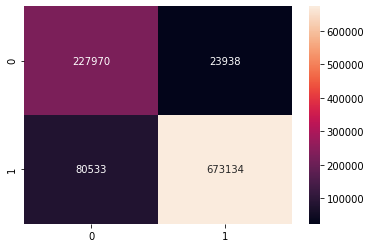

In [ ]:
#confusion matrix visualization using heatmap
sns.heatmap(confusion_matrix(insurance_data.Result.values, Y_pred_whole), annot=True, fmt='.7g' )
plt.show()

In [ ]:
#Saving the model
from joblib import dump, load
dump(model_RF_upsampled, 'model_RF_upsampled.joblib') 

['model_RF_upsampled.joblib']

In [ ]:
## Building Decision tree classifier using upsampling
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dt_upsampled = DecisionTreeClassifier(random_state=0)


In [ ]:
dt_upsampled.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
#classification report for train data
dt_y_pred = dt_upsampled.predict(X_train)

print(classification_report(Y_train, dt_y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    527574
           1       1.00      0.99      0.99    527567

    accuracy                           0.99   1055141
   macro avg       0.99      0.99      0.99   1055141
weighted avg       0.99      0.99      0.99   1055141



In [ ]:
#classification report for test data
dt_y_pred_test = dt_upsampled.predict(X_test)

print(classification_report(Y_test, dt_y_pred_test))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82    226104
           1       0.89      0.69      0.78    226100

    accuracy                           0.80    452204
   macro avg       0.82      0.80      0.80    452204
weighted avg       0.82      0.80      0.80    452204



In [ ]:
#confusion matrix for test data
print(confusion_matrix(Y_test, dt_y_pred_test))

[[205911  20193]
 [ 69593 156507]]


In [ ]:
##classification report for whole data
dt_Y_pred_whole = dt_upsampled.predict(insurance_data.drop(['Result'],axis=1))

print(classification_report(insurance_data.Result.values, dt_Y_pred_whole))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82    251908
           1       0.97      0.90      0.93    753667

    accuracy                           0.90   1005575
   macro avg       0.86      0.90      0.88   1005575
weighted avg       0.91      0.90      0.90   1005575



In [ ]:
#confusion matrix for whole data
print(confusion_matrix(insurance_data.Result.values, dt_Y_pred_whole))

[[229381  22527]
 [ 76487 677180]]


In [ ]:
#Evaluating model using stratified fold method
from sklearn.model_selection import StratifiedKFold 
# Create StratifiedKFold object. 
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 
lst_accu_stratified = [] 
   
for train_index, test_index in skf.split(X, Y): 
    x_train_fold, x_test_fold = X[train_index], X[test_index] 
    y_train_fold, y_test_fold = Y[train_index], Y[test_index] 
    dt_upsampled.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(dt_upsampled.score(x_test_fold, y_test_fold)) 
   
# Print the output. 
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nOverall Accuracy:', 
      np.mean(lst_accu_stratified)*100, '%') 
print('\nStandard Deviation is:', np.std(lst_accu_stratified))

List of possible accuracy: [0.8364812419146184, 0.8370584137725147, 0.8381066109397287, 0.8373171459846751, 0.8366404617374863, 0.8356906869054095, 0.8351864874547216, 0.8377472899279526, 0.8371435774277867, 0.8362413257791872]

Maximum Accuracy That can be obtained from this model is: 83.81066109397287 %

Minimum Accuracy: 83.51864874547216 %

Overall Accuracy: 83.6761324184408 %

Standard Deviation is: 0.0008552818014713715


> **`Stratified Cross Valiadtion`**: 
    Splits the data into k folds, making sure each fold is an appropriate representative of the original data. (class distribution, mean, variance, etc)




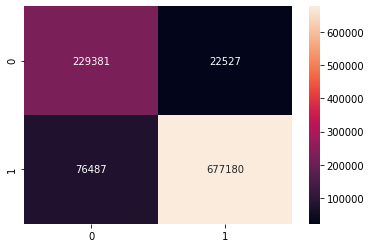

In [ ]:
sns.heatmap(confusion_matrix(insurance_data.Result.values, dt_Y_pred_whole), annot=True, fmt='.7g' )
plt.show()

Decision tree classifier gives final accuracy **83.67%**

In [ ]:
from joblib import dump, load
dump(dt_upsampled, 'dt_upsampled.joblib') 

In [ ]:
#xgboost model using upsampling
from sklearn.ensemble import GradientBoostingClassifier
xgboost_upsampled = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
      max_depth=1, random_state=0).fit(X_train, Y_train)

In [ ]:
#classification report for train data 
xgb_y_pred = xgboost_upsampled.predict(X_train)

print(classification_report(Y_train, xgb_y_pred))

              precision    recall  f1-score   support

           0       0.51      0.50      0.50    527574
           1       0.51      0.52      0.51    527567

    accuracy                           0.51   1055141
   macro avg       0.51      0.51      0.51   1055141
weighted avg       0.51      0.51      0.51   1055141



In [ ]:
#classification report for test data
xgb_y_pred_test = xgboost_upsampled.predict(X_test)

print(classification_report(Y_test, xgb_y_pred_test))

              precision    recall  f1-score   support

           0       0.50      0.49      0.50    226104
           1       0.50      0.52      0.51    226100

    accuracy                           0.50    452204
   macro avg       0.50      0.50      0.50    452204
weighted avg       0.50      0.50      0.50    452204



upsampling or downsampling in xgboost it has same accuracy in both balancing methods

In [ ]:
### xgboost model using downsampling
data_minority = insurance_data.loc[insurance_data['Result']==0]
data_majority = insurance_data.loc[insurance_data['Result']==1]

In [ ]:
#Resampling 
data_majority_downsampled = resample(data_majority, replace=False, n_samples=251896, random_state=42)

In [ ]:
data_balanced = pd.concat([data_majority_downsampled, data_minority ], ignore_index=True)

In [ ]:
X = data_balanced.drop(['Result'],axis=1).values
Y = data_balanced.Result.values

In [ ]:
#Splitting data in train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=42)

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier
xgboost_downsampled = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
      max_depth=1, random_state=0).fit(X_train, Y_train)

In [ ]:
#classification report for train data
xboost_y_pred = xgboost_downsampled.predict(X_train)

print(classification_report(Y_train, xboost_y_pred))

              precision    recall  f1-score   support

           0       0.51      0.50      0.50    176335
           1       0.51      0.53      0.52    176327

    accuracy                           0.51    352662
   macro avg       0.51      0.51      0.51    352662
weighted avg       0.51      0.51      0.51    352662



In [ ]:
#classification report for test data
y_pred_test = xgboost_downsampled.predict(X_test)

print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.50      0.49      0.49     75573
           1       0.50      0.51      0.51     75569

    accuracy                           0.50    151142
   macro avg       0.50      0.50      0.50    151142
weighted avg       0.50      0.50      0.50    151142



In [ ]:
#confusion matrix for test data 
print(confusion_matrix(Y_test, y_pred_test))

[[36662 38911]
 [36707 38862]]


In [ ]:
#classification report for whole data
y_pred_whole = xgboost_downsampled.predict(insurance_data.drop(['Result'],axis=1))

print(classification_report(insurance_data.Result.values, y_pred_whole))

              precision    recall  f1-score   support

           0       0.25      0.49      0.34    251908
           1       0.75      0.52      0.61    753667

    accuracy                           0.51   1005575
   macro avg       0.50      0.51      0.47   1005575
weighted avg       0.63      0.51      0.54   1005575



In [ ]:
#confusion matrix for whole data
print(confusion_matrix(insurance_data.Result.values, y_pred_whole))

[[124022 127886]
 [362897 390770]]


In [ ]:
#Evaluating model using StratifiedKFold
from sklearn.model_selection import StratifiedKFold 
# Create StratifiedKFold object. 
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 
lst_accu_stratified = [] 
   
for train_index, test_index in skf.split(X, Y): 
    x_train_fold, x_test_fold = X[train_index], X[test_index] 
    y_train_fold, y_test_fold = Y[train_index], Y[test_index] 
    xgboost_downsampled.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(xgboost_downsampled.score(x_test_fold, y_test_fold)) 
   
# Print the output. 
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nOverall Accuracy:', 
      np.mean(lst_accu_stratified)*100, '%') 
print('\nStandard Deviation is:', np.std(lst_accu_stratified))

List of possible accuracy: [0.5023322284194438, 0.5016375220817372, 0.5012008495266073, 0.499156428018499, 0.4998809051210798, 0.5021635569670504, 0.5052600238189758, 0.5005359269551409, 0.4969829297340214, 0.5051409289400556]

Maximum Accuracy That can be obtained from this model is: 50.526002381897584 %

Minimum Accuracy: 49.69829297340214 %

Overall Accuracy: 50.142912995826116 %

Standard Deviation is: 0.0024089913001092457


With downsampling xgboost gives very less accuracy i.e. 50% only

In [ ]:
pip install sweetviz

In [ ]:
# importing sweetviz
import sweetviz as sv

In [ ]:
#analyzing the dataset
EDA_report = sv.analyze(insurance_data)

In [ ]:
#display the report
EDA_report.show_html('/content/drive/MyDrive/Colab Notebooks/insurance_data.html');

In [ ]:
import platform
print(platform.python_version())

3.6.9
